In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from hdfs import InsecureClient

In [5]:
hdfs_url = "http://localhost:9870"
client = InsecureClient(hdfs_url, user="adam")

In [11]:
output_path = "/user/adam/c0_1/output/part-00000"

In [25]:
word_freq = {} 
with client.read(output_path, encoding='utf-8') as reader:
    for line in reader:
        line = line.split()
        text = re.sub(r'[^a-zA-Z\s]', '', line[0]).lower()
        word = re.sub(r'\s+', ' ', text).strip()
        if len(line) == 2 and word:
            if word in word_freq:
                word_freq[word] += int(line[1])
            else: word_freq[word] = int(line[1])

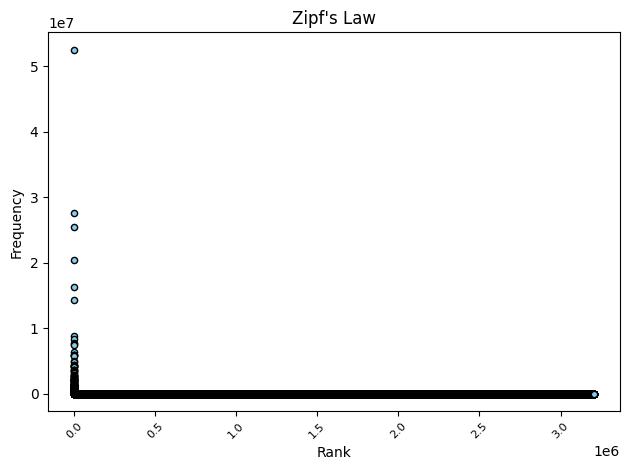

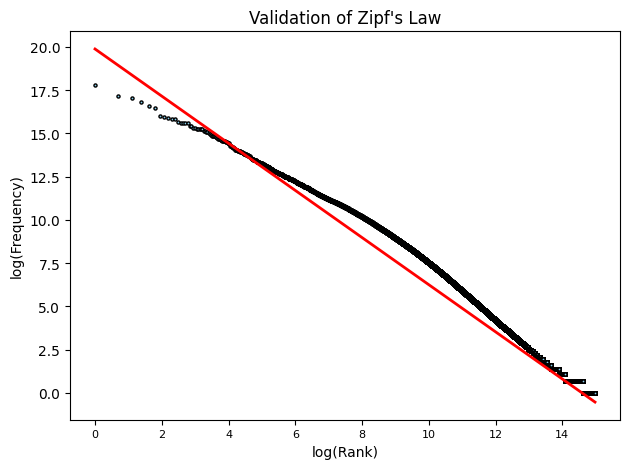

In [27]:
words_counts_ranked = dict(sorted(word_freq.items(), 
                                  key=lambda item: item[1], 
                                  reverse=True))
ranked_df = pd.DataFrame(list(words_counts_ranked.items()), 
                         columns=['Word', 'Frequency'])
ranked_df.insert(loc=2, column='Rank', 
                 value=range(1, len(words_counts_ranked.items()) + 1))

ranked_df.plot(kind='scatter', x='Rank', y='Frequency', 
               color='skyblue', edgecolor='black')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Zipf\'s Law')
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

log_ranked_df = ranked_df.copy()
log_ranked_df['Rank'] = np.log(ranked_df['Rank'])
log_ranked_df['Frequency'] = np.log(ranked_df['Frequency'])

A = log_ranked_df['Rank'].values
maxValue = A[-1]
A = np.column_stack((A, np.ones(len(A), dtype='int64')))

b = np.array(log_ranked_df['Frequency'].values, dtype='int64')

[m, c] = np.linalg.inv(A.T @ A) @ A.T @ b
alpha, corpus_constant = - m, np.exp(c)

x = np.linspace(0, maxValue, 1000)
y = m * x + c

log_ranked_df.plot(kind='scatter', x='Rank', y='Frequency', 
                   color='skyblue', edgecolor='black', s=5)
plt.plot(x, y, color='red', linewidth=2)
plt.xlabel('log(Rank)')
plt.ylabel('log(Frequency)')
plt.title('Validation of Zipf\'s Law')
plt.xticks(fontsize=8)
plt.tight_layout()
plt.show()